#Case Study 6 - Deep Neural Networks

By: Allen Hoskins & Brittany Lewandowski 

In [2]:
#Importing required libraries:

import pandas as pd
import numpy as np 
import tensorflow as tf 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error,mean_squared_error,roc_curve, auc, precision_recall_curve, classification_report, average_precision_score
from sklearn.preprocessing import StandardScaler
from keras.layers import Input
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Input


In [2]:
%matplotlib inline
tf.random.set_seed(1)
#warnings.filterwarnings("ignore")

##Allen's Import statement

In [3]:
df = pd.read_csv(r'/Users/allen/Desktop/MSDS/QTW/large datasets/all_train.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

##Unzipping .gz file - Google Colab

In [4]:
#Reading in file to a dataframe:

df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [6]:
#Viewing general data related information:

display(df.info())
display(df.describe())
display(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   # label  float64
 1   f0       float64
 2   f1       float64
 3   f2       float64
 4   f3       float64
 5   f4       float64
 6   f5       float64
 7   f6       float64
 8   f7       float64
 9   f8       float64
 10  f9       float64
 11  f10      float64
 12  f11      float64
 13  f12      float64
 14  f13      float64
 15  f14      float64
 16  f15      float64
 17  f16      float64
 18  f17      float64
 19  f18      float64
 20  f19      float64
 21  f20      float64
 22  f21      float64
 23  f22      float64
 24  f23      float64
 25  f24      float64
 26  f25      float64
 27  f26      float64
 28  mass     float64
dtypes: float64(29)
memory usage: 1.5 GB


None

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


float64    29
dtype: int64

In [7]:
#Viewing missing values in our data frame:

df.isna().sum()

# label    0
f0         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
mass       0
dtype: int64

##EDA:

In [ ]:
#Report 

sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

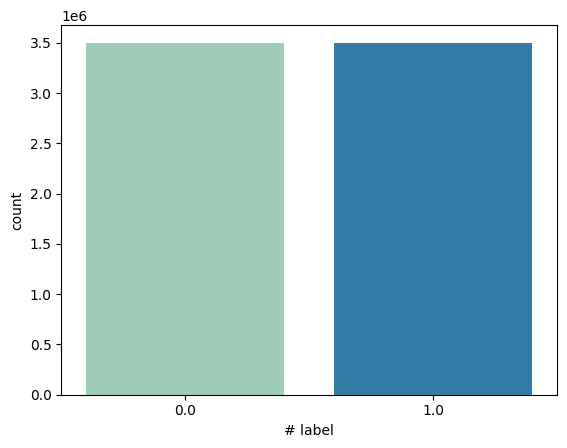

In [8]:
#Viewing distribution of our response: 
#The response is balanced. 

sns.countplot(data=df,x='# label',palette='YlGnBu')
plt.show()

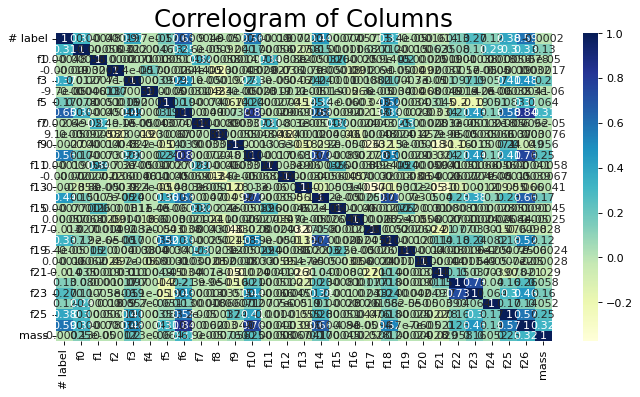

In [9]:
# Creating a correlation plot of our features:
# Won't include in report because it is an eye sore, however I can see there are no columns with a correlaiton coefficient =1. 

plt.figure(figsize=(10,5), dpi= 80)
corr1 = df.corr()
sns.heatmap(corr1,
            cmap = "YlGnBu",
            annot=True,
            annot_kws ={'size':10})    
plt.title('Correlogram of Columns', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


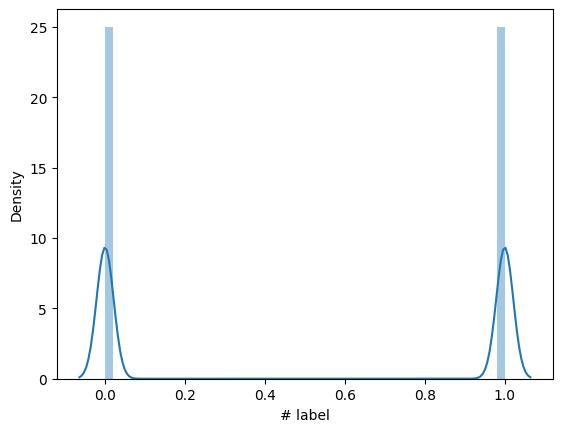

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


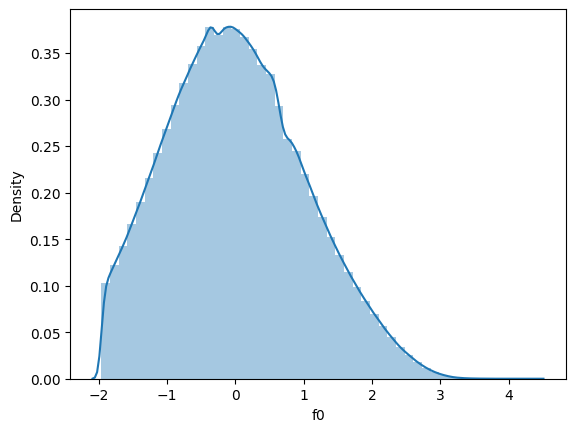

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


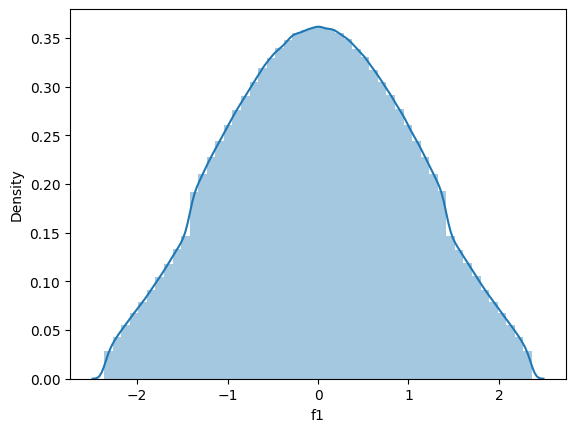

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


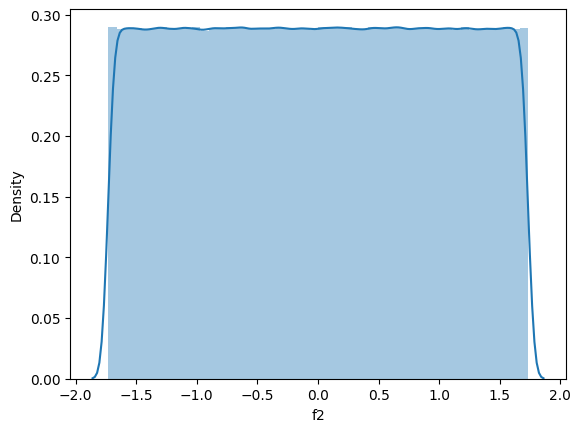

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


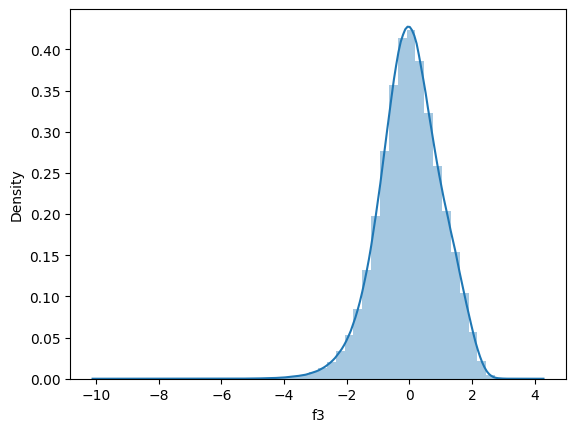

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


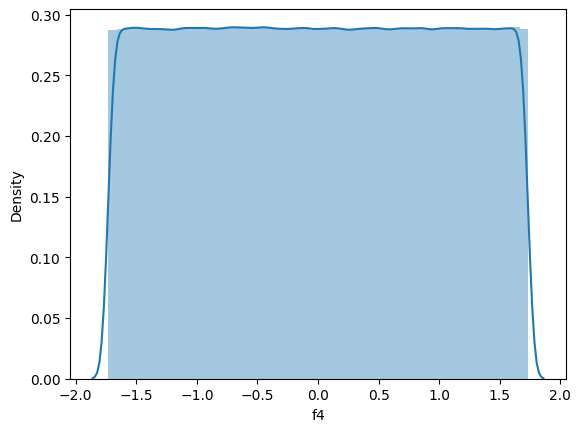

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


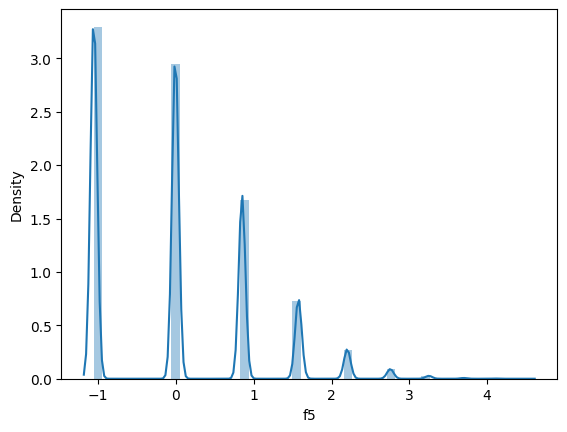

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


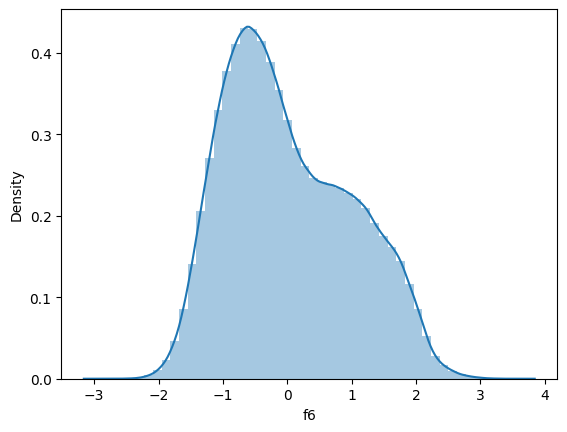

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


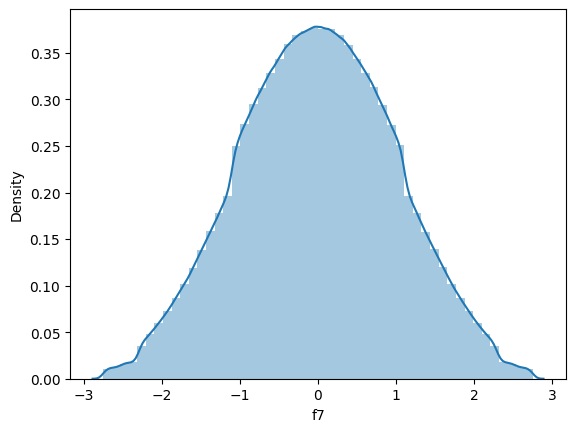

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


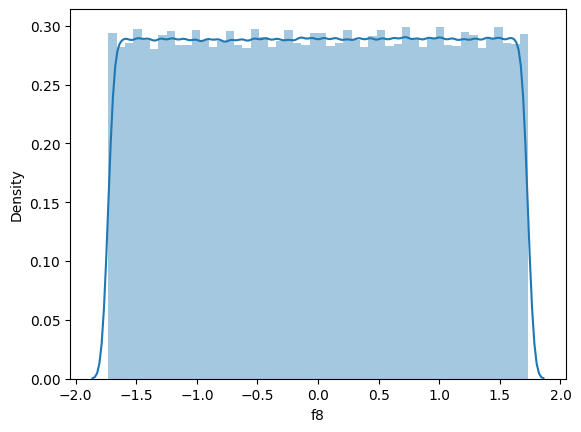

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


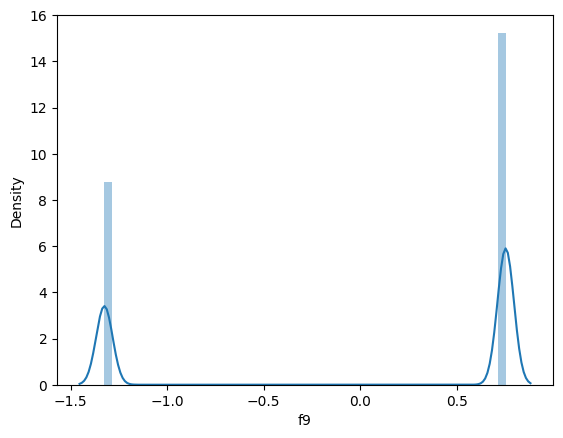

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


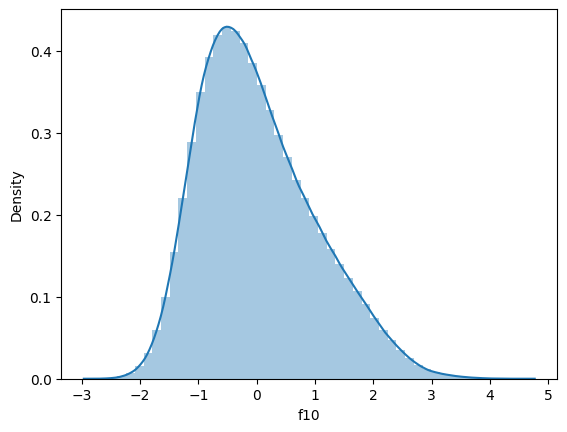

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


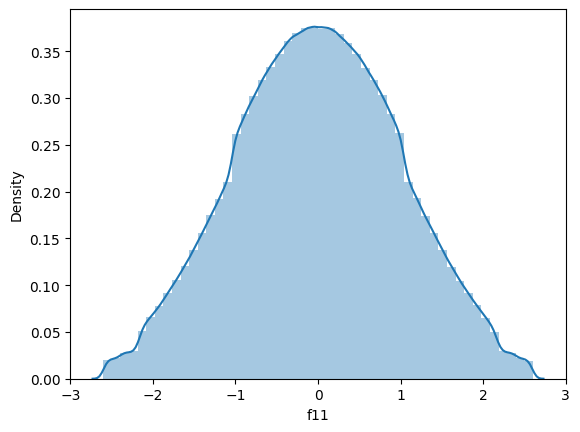

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


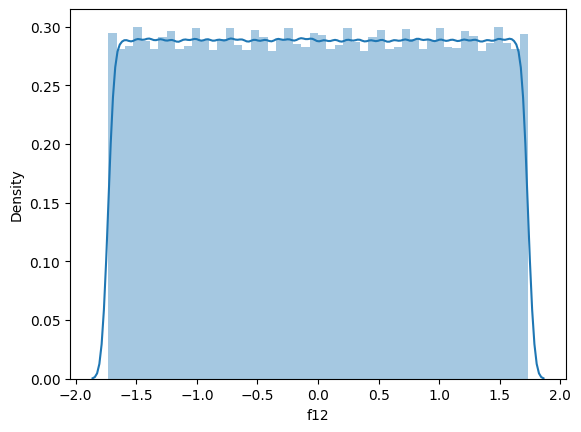

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


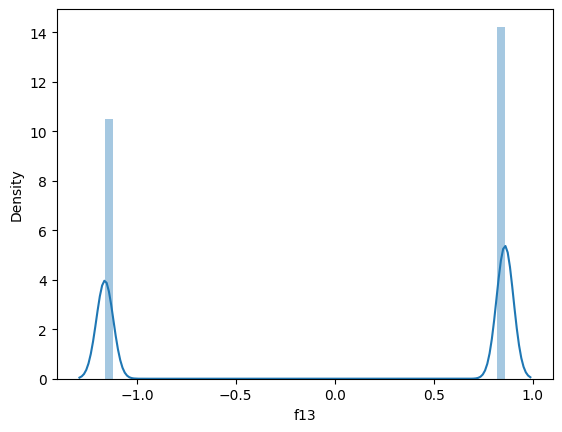

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


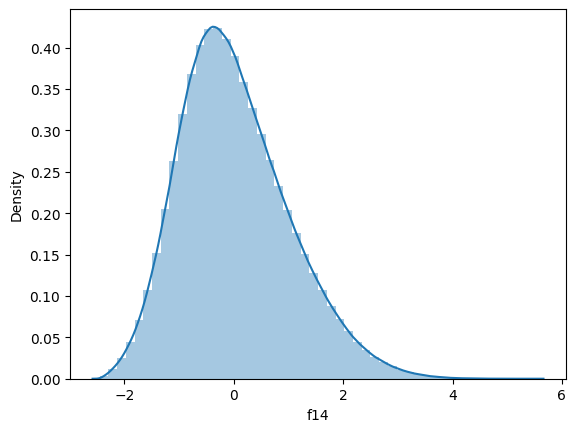

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


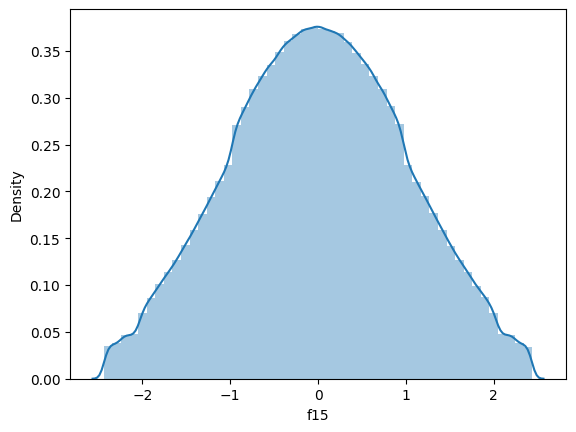

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


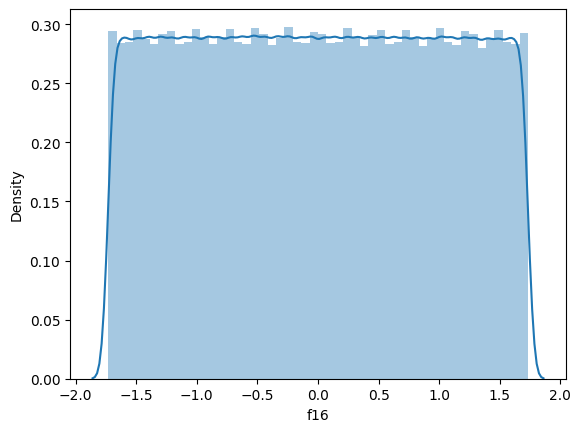

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


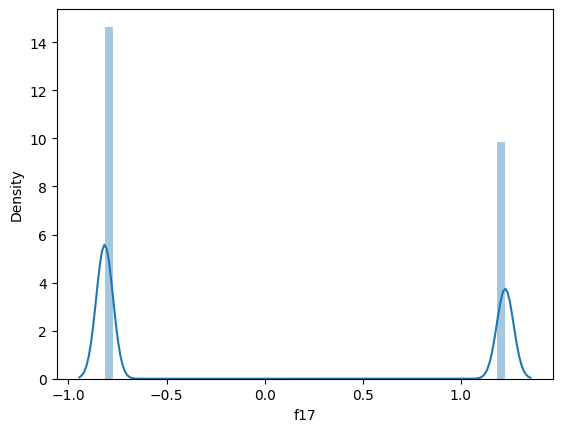

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


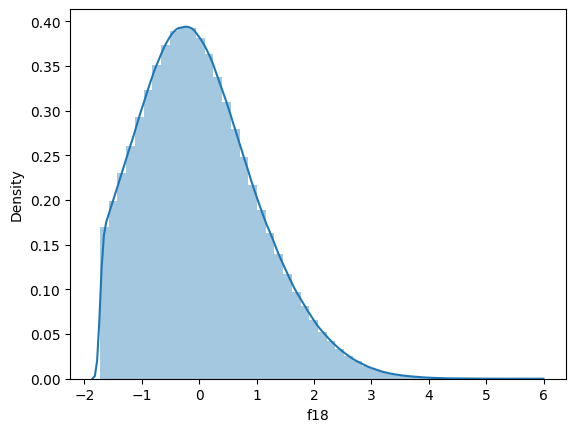

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


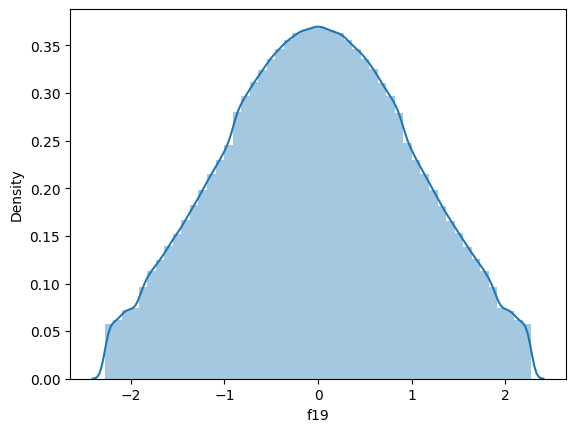

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


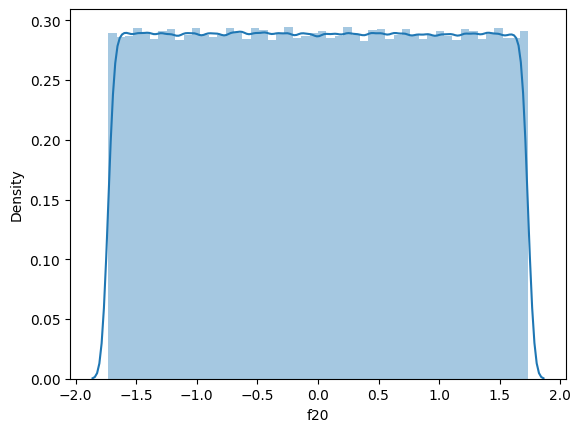

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


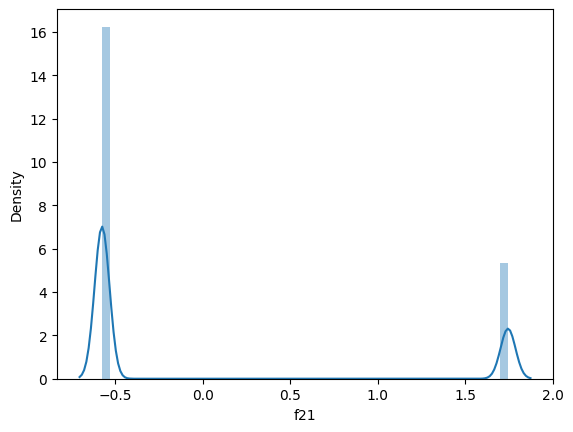

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


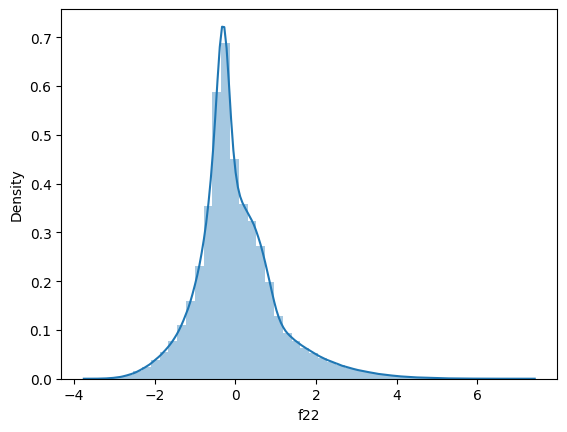

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


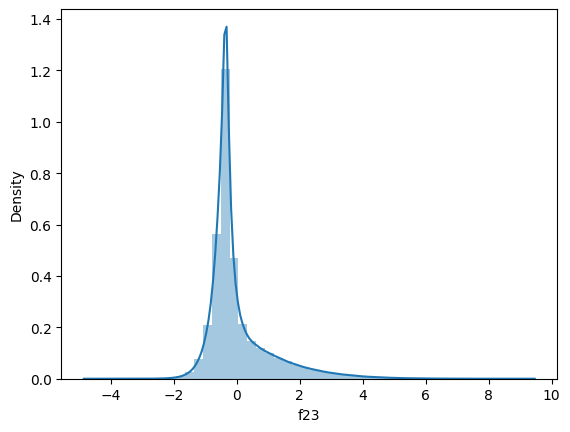

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


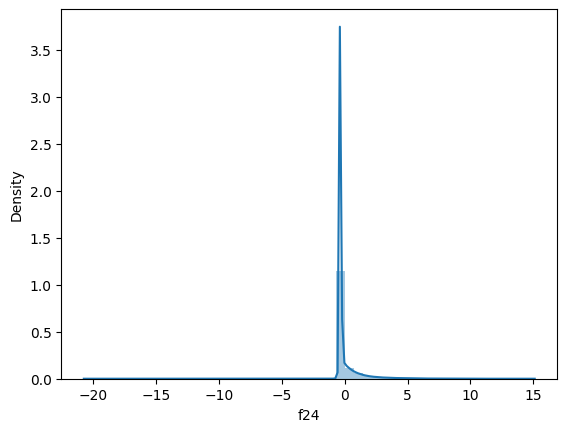

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


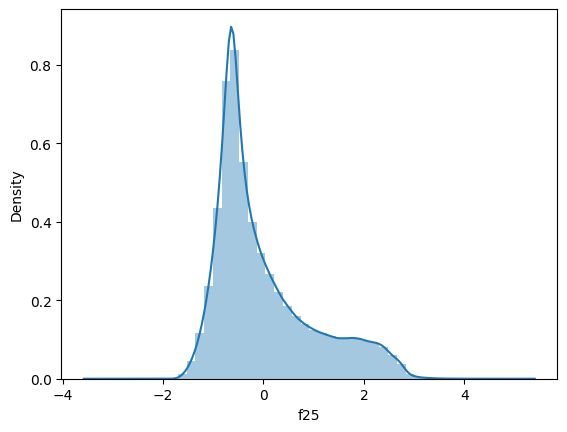

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


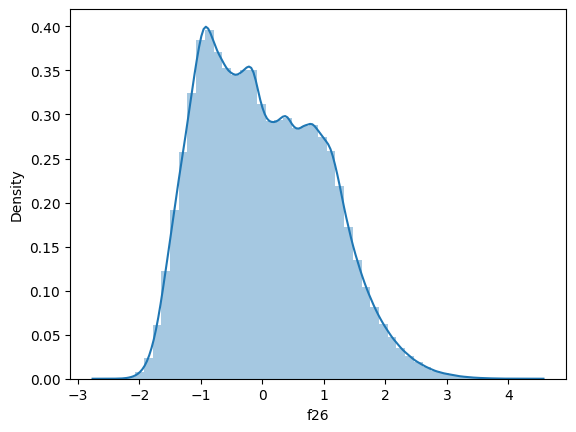

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


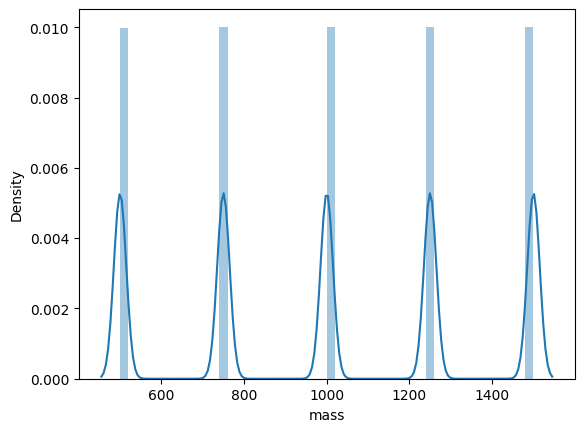

In [10]:
#Looping through and displaying the distribution for columns in our DF:

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

## Model Preparation:

In [4]:
#Setting a seed:

np.random.seed(1234)

In [5]:
#Splitting our feature columns from our response:

X = df.loc[:, df.columns != '# label']
y = df['# label']


In [6]:
#Scaling data with a standard scaler:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [7]:
#Splitting our data into an 80/20 traint test split:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=0)

In [8]:
#Viwing the shapes of our X_train and X_test splits:

display(X_train.shape)
display(X_test.shape)

(5600000, 28)

(1400000, 28)

***
## Begin NN Modeling:

In [55]:
#Defining our model:
tf.random.set_seed(1)

model_base = Sequential()
model_batch= Sequential()
model_dropout = Sequential()

In [56]:
#Creating our NN's architecture:

model_base.add(tf.keras.Input(shape=(28,))) #Input layer
model_base.add(tf.keras.layers.Dense(50,activation='relu')) #Second hidden layer
model_base.add(tf.keras.layers.Dense(10,activation='relu')) #Third hidden layer
model_base.add(tf.keras.layers.Dense(1,activation='sigmoid')) #Output layer

model_batch.add(tf.keras.Input(shape=(28,))) #Input layer
model_batch.add(tf.keras.layers.Dense(100,activation='relu')) #Second hidden layer
model_batch.add(tf.keras.layers.Dense(50,activation='relu')) #Second hidden layer
model_batch.add(tf.keras.layers.Dense(10,activation='relu')) #Third hidden layer
model_batch.add(tf.keras.layers.Dense(1,activation='sigmoid')) #Output layer

model_dropout.add(tf.keras.Input(shape=(28,))) #Input layer
model_dropout.add(tf.keras.layers.Dense(100,activation='relu')) #Second hidden layer
model_dropout.add(tf.keras.layers.Dropout(rate=.2,input_shape=(28,))) #Second hidden layer
model_dropout.add(tf.keras.layers.Dense(50,activation='relu')) #Second hidden layer
model_dropout.add(tf.keras.layers.Dropout(rate=.2,input_shape=(28,))) #Second hidden layer
model_dropout.add(tf.keras.layers.Dense(10,activation='relu')) #Third hidden layer
model_dropout.add(tf.keras.layers.Dense(1,activation='sigmoid')) #Output layer

In [57]:
#Compiling our model:

model_base.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_batch.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
#Loading tensorboard:
%load_ext tensorboard



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [59]:
#from time import time 
#tb = tensorboard(log_dir=f"logs\\{time()}")

#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [60]:
#Staring TB:

%tensorboard — logdir logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] {serve,dev} ...
tensorboard: error: argument {serve,dev}: invalid choice: '—' (choose from 'serve', 'dev')

In [61]:
#Implementing early stopping rounds:

es = EarlyStopping(monitor='val_loss',patience=2)

In [62]:
#Fitting our model:
model_base.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=500,callbacks=[es])


Epoch 1/10


2022-11-11 12:04:37.419277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11194/11200 [============================>.] - ETA: 0s - loss: 0.3941 - accuracy: 0.8291

2022-11-11 12:05:41.683075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11200/11200 [==============================] - 73s 6ms/step - loss: 0.3941 - accuracy: 0.8291 - val_loss: 0.3623 - val_accuracy: 0.8252
Epoch 2/10
11200/11200 [==============================] - 71s 6ms/step - loss: 0.3467 - accuracy: 0.8387 - val_loss: 0.3332 - val_accuracy: 0.8466
Epoch 3/10
11200/11200 [==============================] - 71s 6ms/step - loss: 0.3190 - accuracy: 0.8501 - val_loss: 0.3108 - val_accuracy: 0.8537
Epoch 4/10
11200/11200 [==============================] - 71s 6ms/step - loss: 0.3105 - accuracy: 0.8543 - val_loss: 0.3025 - val_accuracy: 0.8585
Epoch 5/10
11200/11200 [==============================] - 71s 6ms/step - loss: 0.3067 - accuracy: 0.8562 - val_loss: 0.2998 - val_accuracy: 0.8598
Epoch 6/10
11200/11200 [==============================] - 71s 6ms/step - loss: 0.3042 - accuracy: 0.8576 - val_loss: 0.3102 - val_accuracy: 0.8548
Epoch 7/10
11200/11200 [==============================] - 74s 7ms/step - loss: 0.3011 - accuracy: 0.8592 - val_loss: 0.3034 - val

In [63]:
model_batch.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=1000,callbacks=[es])

Epoch 1/10


2022-11-11 12:13:00.067764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5594/5600 [============================>.] - ETA: 0s - loss: 0.3801 - accuracy: 0.8277

2022-11-11 12:13:34.398091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5600/5600 [==============================] - 39s 7ms/step - loss: 0.3800 - accuracy: 0.8277 - val_loss: 0.3512 - val_accuracy: 0.8465
Epoch 2/10
5600/5600 [==============================] - 39s 7ms/step - loss: 0.3345 - accuracy: 0.8437 - val_loss: 0.3247 - val_accuracy: 0.8494
Epoch 3/10
5600/5600 [==============================] - 38s 7ms/step - loss: 0.3177 - accuracy: 0.8505 - val_loss: 0.3099 - val_accuracy: 0.8538
Epoch 4/10
5600/5600 [==============================] - 37s 7ms/step - loss: 0.3108 - accuracy: 0.8538 - val_loss: 0.3057 - val_accuracy: 0.8572
Epoch 5/10
5600/5600 [==============================] - 37s 7ms/step - loss: 0.3062 - accuracy: 0.8564 - val_loss: 0.3051 - val_accuracy: 0.8570
Epoch 6/10
5600/5600 [==============================] - 38s 7ms/step - loss: 0.3016 - accuracy: 0.8588 - val_loss: 0.3003 - val_accuracy: 0.8597
Epoch 7/10
5600/5600 [==============================] - 38s 7ms/step - loss: 0.2972 - accuracy: 0.8615 - val_loss: 0.2952 - val_accuracy: 0.8

In [72]:
model_dropout.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=500,callbacks=[es])

Epoch 1/10
11200/11200 [==============================] - 85s 8ms/step - loss: 0.6931 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4997
Epoch 2/10
11200/11200 [==============================] - 78s 7ms/step - loss: 0.6931 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 3/10
11200/11200 [==============================] - 78s 7ms/step - loss: 0.6931 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4997
Epoch 4/10
11200/11200 [==============================] - 78s 7ms/step - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4997


In [65]:
model_base.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 50)                1450      
                                                                 
 dense_45 (Dense)            (None, 10)                510       
                                                                 
 dense_46 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,971
Trainable params: 1,971
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_dropout.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 100)               2900      
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_52 (Dense)            (None, 50)                5050      
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_53 (Dense)            (None, 10)                510       
                                                                 
 dense_54 (Dense)            (None, 1)                 11        
                                                                 
Total params: 8,471
Trainable params: 8,471
Non-train

In [67]:
model_batch.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 100)               2900      
                                                                 
 dense_48 (Dense)            (None, 50)                5050      
                                                                 
 dense_49 (Dense)            (None, 10)                510       
                                                                 
 dense_50 (Dense)            (None, 1)                 11        
                                                                 
Total params: 8,471
Trainable params: 8,471
Non-trainable params: 0
_________________________________________________________________


#Evaluating model:
_, base_train_acc = model_base.evaluate(X_train, y_train, verbose=0)
_base, base_test_acc = model_base.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (base_train_acc, base_test_acc))

_, batch_train_acc = model_batch.evaluate(X_train, y_train, verbose=0)
_batch, batch_test_acc = model_batch.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (batch_train_acc, batch_test_acc))

_dropout,droupout_test_acc = model_dropout.evaluate(X_test, y_test, verbose=0)
_, droupout_train_acc = model_dropout.evaluate(X_train, y_train, verbose=0)
print('Train: %.3f, Test: %.3f' % (droupout_train_acc, droupout_test_acc))

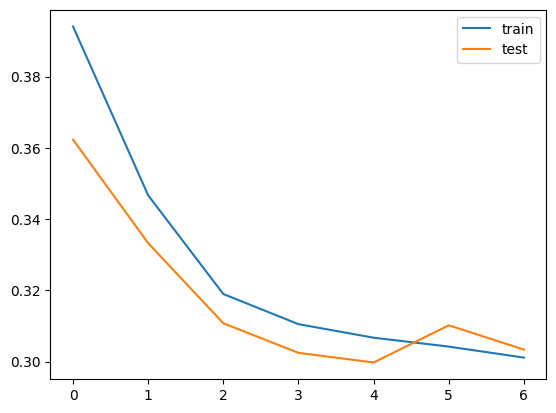

In [68]:
#Plotting train/test results:

plt.plot(model_base.history.history['loss'], label='train')
plt.plot(model_base.history.history['val_loss'], label='test')
plt.legend()
plt.show()

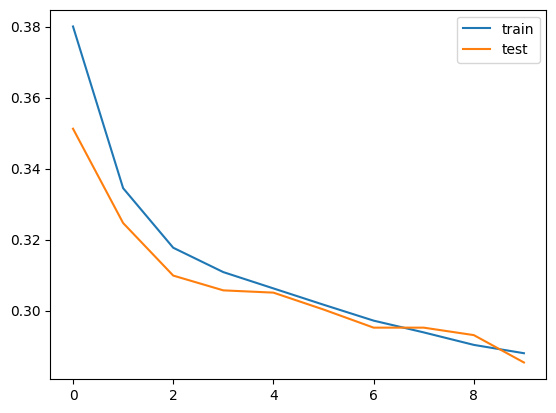

In [70]:
plt.plot(model_batch.history.history['loss'], label='train')
plt.plot(model_batch.history.history['val_loss'], label='test')
plt.legend()
plt.show()

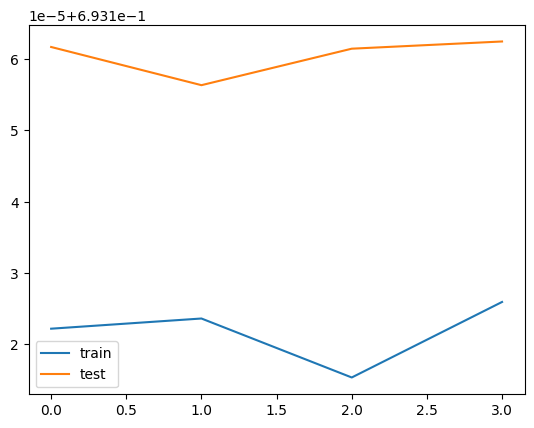

In [74]:
plt.plot(model_dropout.history.history['loss'], label='train')
plt.plot(model_dropout.history.history['val_loss'], label='test')
plt.legend()
plt.show()